In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

`%matplotlib`: any plt plot command will now cause a figure window to open, and further commands can be run to update the plot. Some changes will not draw automatically, to force an update, use plt.draw()

`%matplotlib notebook`: will lead to interactive plots embedded within the notebook, you can zoom and resize the figure

`%matplotlib inline`: only draw static images in the notebook

In [86]:
# x is of length L
def DFT(x, N):
    def dft_x(k):
        sum_x = 0
        for i, xi in enumerate(x):
            sum_x += xi * np.exp(-2j * np.pi * k * i / N)
        return sum_x
    return dft_x

### DFT and resolution

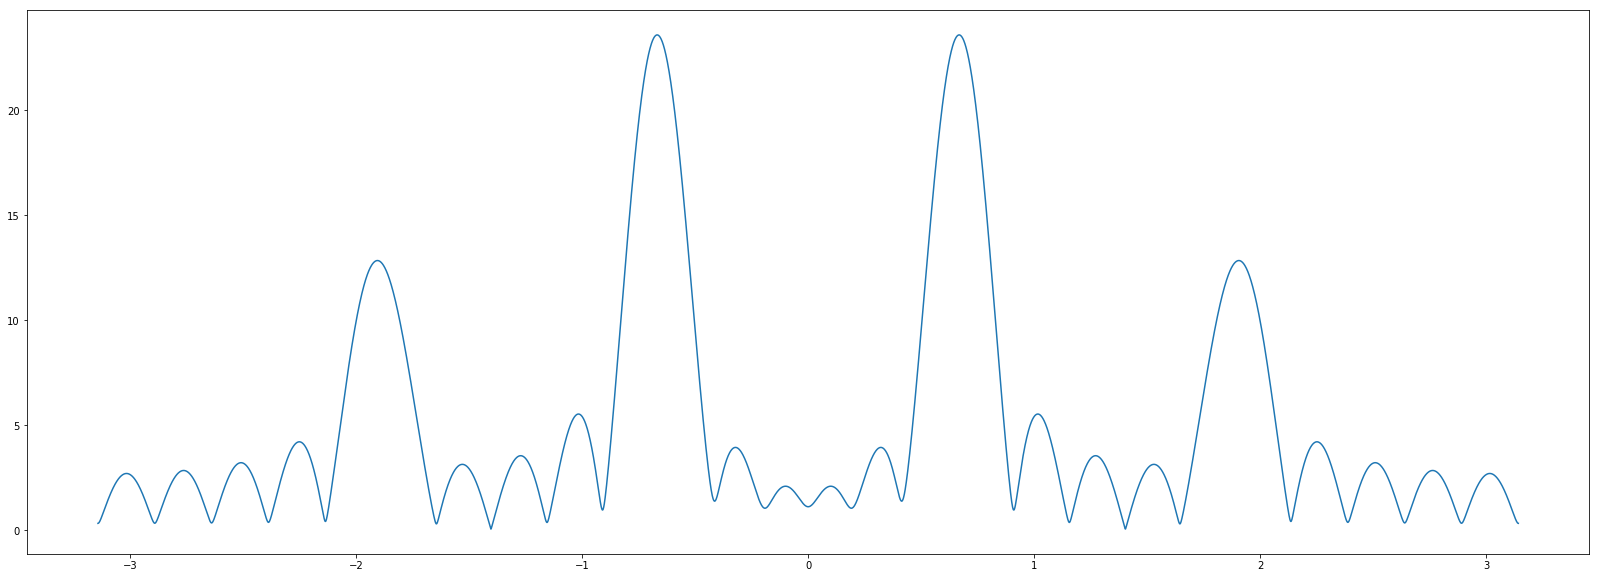

In [89]:
N = 2048 # devide 2pi into 2048 parts
L = 25
w0 = np.pi / 6
x2 = [np.cos(0.2 * np.pi * i) + np.cos(0.22 * np.pi * i) + np.cos(0.6 * np.pi * i) for i in range(L)]
dftX2 = DFT(x2, N)
k = np.linspace(-1024, 1024, 5000)
y2 = np.array([dftX2(i) for i in k])

plt.figure(figsize = (28, 10))
plt.plot(k *np.pi/1024, abs(y2))

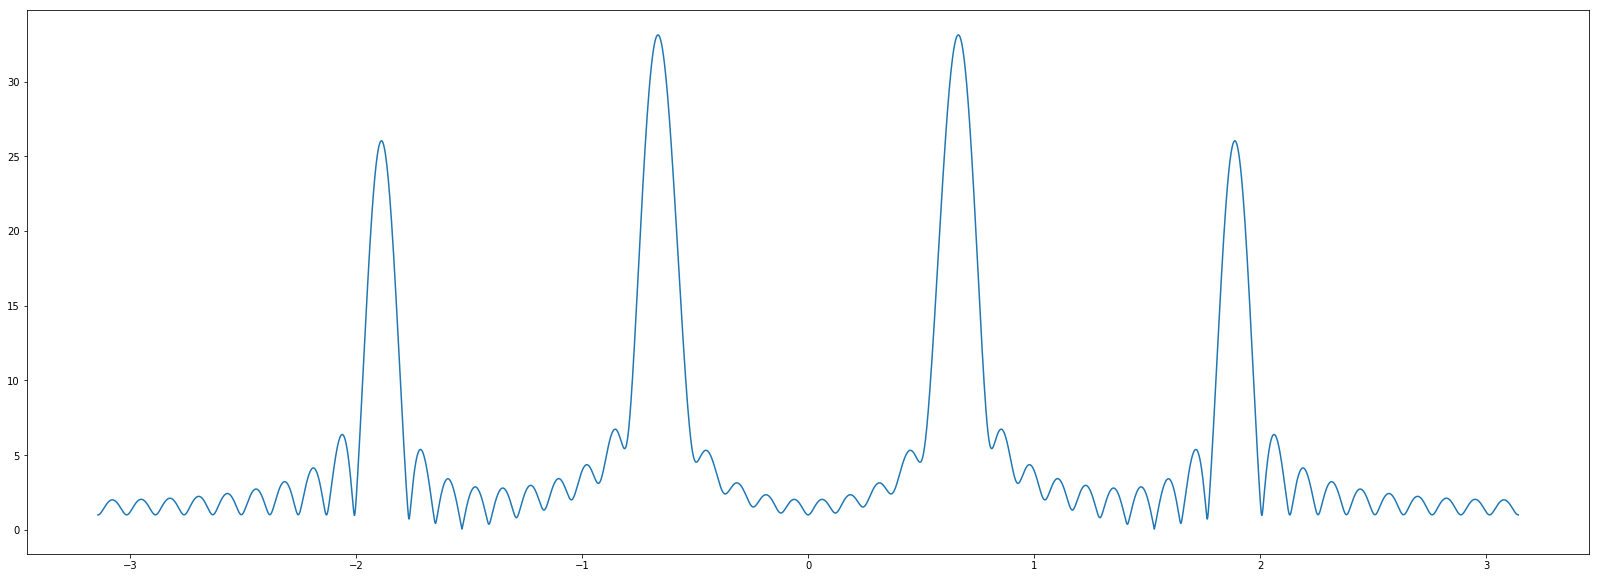

In [90]:
N = 2048 # devide 2pi into 2048 parts
L = 50
w0 = np.pi / 6
x2 = [np.cos(0.2 * np.pi * i) + np.cos(0.22 * np.pi * i) + np.cos(0.6 * np.pi * i) for i in range(L)]
dftX2 = DFT(x2, N)
k = np.linspace(-1024, 1024, 5000)
y2 = np.array([dftX2(i) for i in k])

plt.figure(figsize = (28, 10))
plt.plot(k *np.pi/1024, abs(y2))

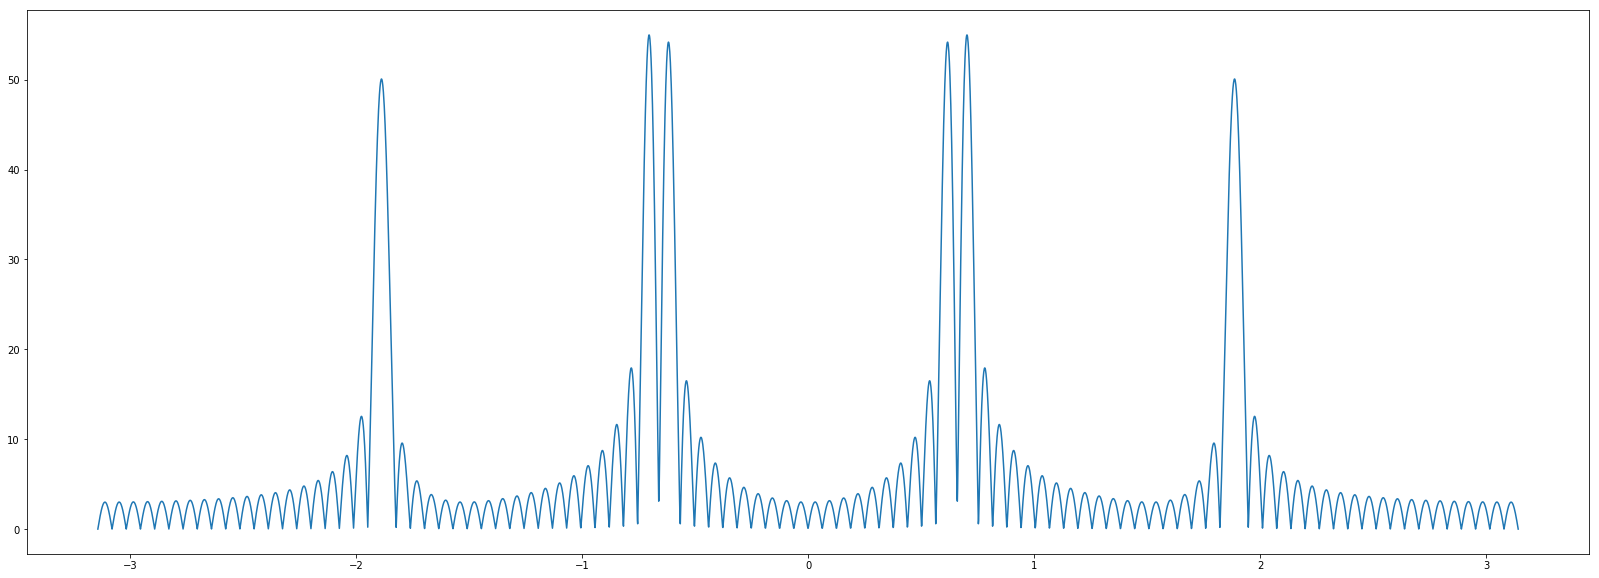

In [91]:
N = 2048 # devide 2pi into 2048 parts
L = 100
w0 = np.pi / 6
x2 = [np.cos(0.2 * np.pi * i) + np.cos(0.22 * np.pi * i) + np.cos(0.6 * np.pi * i) for i in range(L)]
dftX2 = DFT(x2, N)
k = np.linspace(-1024, 1024, 5000)
y2 = np.array([dftX2(i) for i in k])

plt.figure(figsize = (28, 10))
plt.plot(k *np.pi/1024, abs(y2))

### Basic DFT

In [54]:
N = 100
L = 25
k = [i for i in range(N)]
x = np.ones(L)

In [44]:
dftX = DFT(x, N)

In [45]:
y = np.array([dftX(i) for i in k])

<StemContainer object of 3 artists>

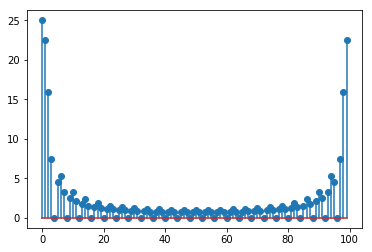

In [53]:
plt.stem(k, abs(y2))

<StemContainer object of 3 artists>

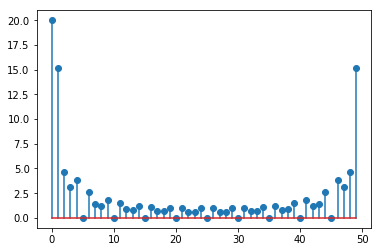

In [36]:
plt.stem(k, abs(y))

<StemContainer object of 3 artists>

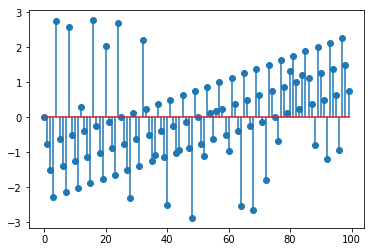

In [46]:
plt.stem(k, np.angle(y))

<StemContainer object of 3 artists>

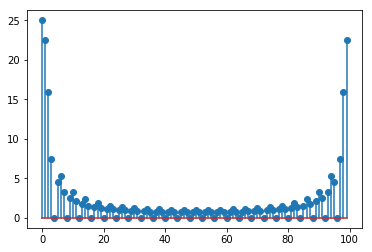

In [47]:
plt.stem(k, abs(y))

<StemContainer object of 3 artists>

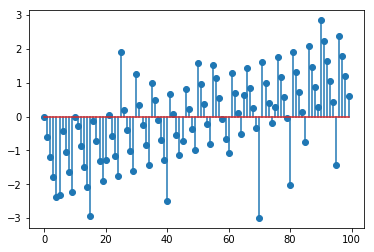

In [42]:
plt.stem(k, np.angle(y))

In [4]:
def window(L):
    def win(w):
        return np.sin(w*L/2)*np.exp(-1j*(L-1)/2)/np.sin(w/2)
    return win

In [57]:
y = []
x = np.linspace(-np.pi,np.pi,1000)
for L in [10, 25, 50, 100]:
    wi = window(L)
    yi = []
    for i in x:
        yi.append(abs(wi(i-np.pi/2) + wi(i+np.pi/2)))
        # yi.append(abs(wi(i)))
    y.append(yi)

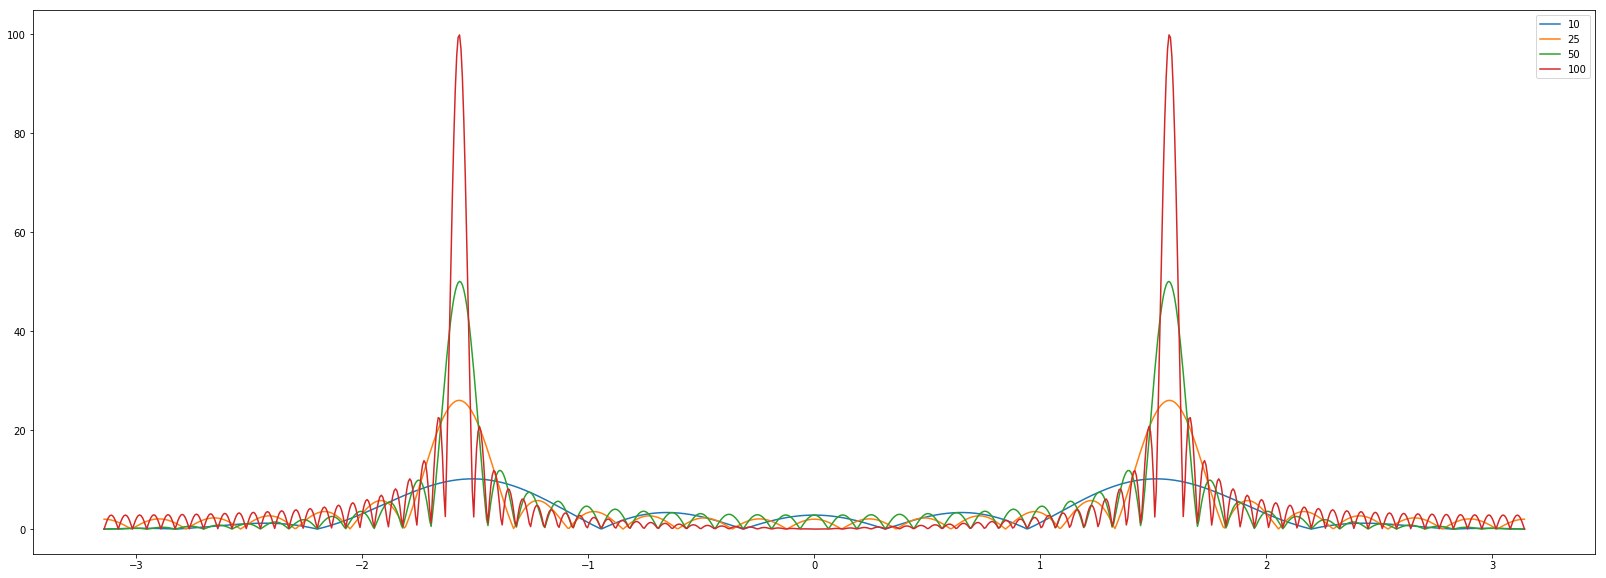

In [58]:
plt.figure(figsize = (28, 10))
for yi in y:
    plt.plot(x, yi)
label = ["10", "25", "50", "100"]  
plt.legend(label)

### Example

The signal $x_{a}(t)=e^{-t} u(t)$ is sampled at the rate $F_s = 20$ samples per second, and a block of $L = 100$ or $20$ samples is used to estimate its spectrum. Determine the spectral characteristics of $x_a(t)$ by computing the DFT of the finite-duration sequence.

The sampled function is $x(n) = e^{-\frac{n}{20}}$. Let $a = e^{-\frac{1}{20}}$, $x(n) = a^n$.

After windowing, 
$$
\hat{x}(n)=\left\{\begin{array}{ll}{0.95^{n},} & {0 \leq n \leq L-1} \\ {0,} & {\text { otherwise }}\end{array}\right.
$$

<StemContainer object of 3 artists>

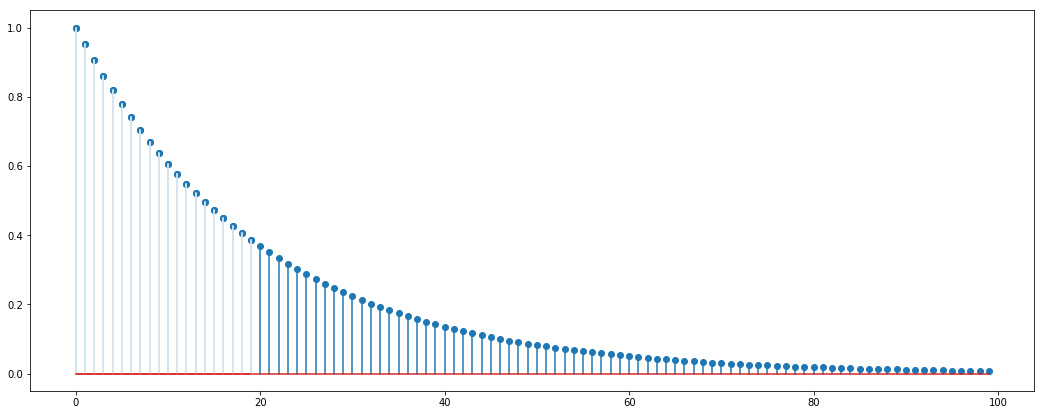

In [18]:
# Plot the sampled discrete signal. Using L = 100
a = np.exp(-1/20)
L = [20, 100]
plt.figure(figsize=(18,7))

x2 = [i for i in range(L[1])]
y2 = [a**i for i in range(L[1])]    # y2 is the L = 100 windowed function
plt.stem(x2, y2)

x1 = [i for i in range(L[0])]
y1 = [a**i for i in range(L[0])]    # y1 is the L = 20 windowed function
plt.stem(x1, y1, 'w')


In [21]:
def DFT(L, N):
    base = np.exp(-2j*np.pi/N)
    def X(k):
        count = 0
        for n, val in enumerate(L):
            count += val * base**(n*k)
        return count
    return X

x200 = [i for i in range(200)]

<StemContainer object of 3 artists>

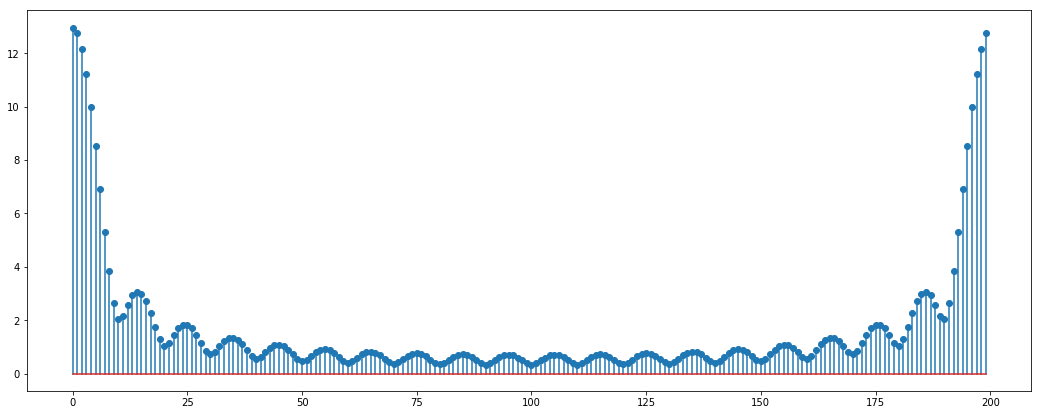

In [35]:
L20 = DFT(y1, 200)
plt.figure(figsize=(18,7))
xk1 = [abs(L20(i)) for i in x200]
plt.stem(x200, xk1)

#### Original spectrum
$$X_a(F) = \frac{1}{1+j 2 \pi F}$$

<StemContainer object of 3 artists>

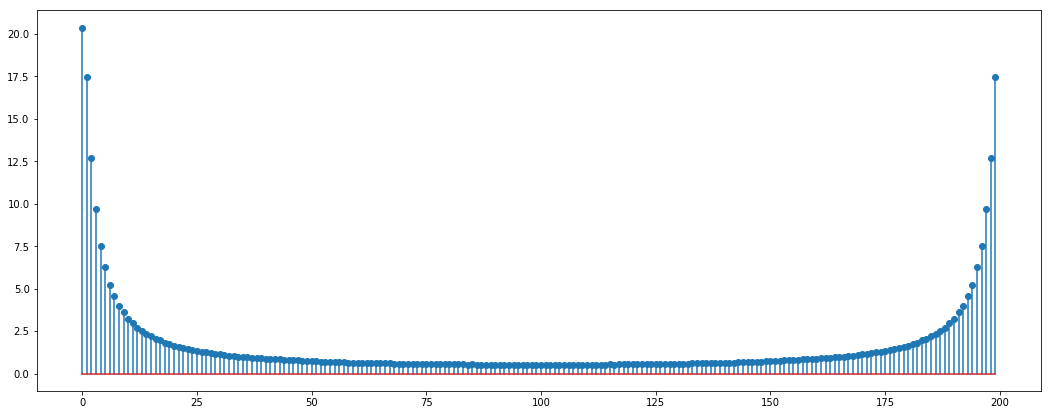

In [40]:
L100 = DFT(y2, 200)
plt.figure(figsize=(18,7))
xk2 = [abs(L100(i)) for i in x200]
plt.stem(x200, xk2)

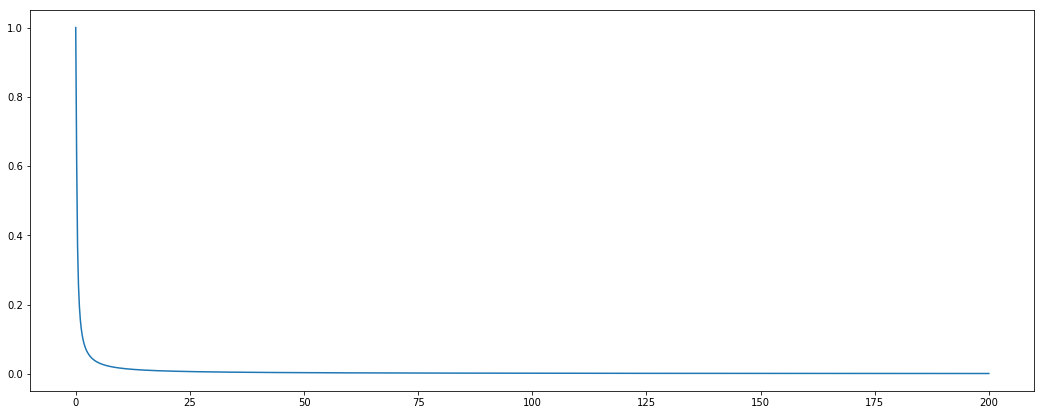

In [41]:
plt.figure(figsize=(18,7))
xa = np.linspace(0, 200, 1000)
xaf = [abs(1/(1+2j*np.pi*i)) for i in xa]
plt.plot(xa, xaf)